Importing MNIST dataset

In [115]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

Extracting the training and test data and their target values.

In [38]:
X = mnist['data']
y = mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


Visualizing a single instance of data as a image

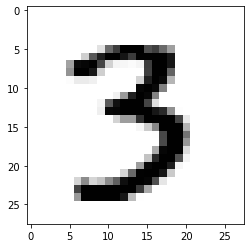

In [39]:
some_digit = X[10000].reshape((28,28))

import matplotlib
import matplotlib.pyplot as plt

plt.imshow(some_digit, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('on')
plt.show()

Scaling the data using StandardScaler() class of sklearn

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Dividing the data into training, validation and test data after scaling
X_train, X_val = scaler.fit_transform(X[:50000]), scaler.fit_transform(X[50000:60000])
X_test = scaler.fit_transform(X[60000:70000])
y_train, y_val, y_test = y[:50000], y[50000:60000], y[60000:70000]




Using RandomForest Classifier to fit and predict

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
forest_clf = RandomForestClassifier(n_jobs=-1, max_features='log2', n_estimators=500, max_samples=0.7)

forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=0.7, n_estimators=500,
                       n_jobs=-1)

In [57]:
# using accuracy metric
from sklearn.metrics import accuracy_score
forest_pred = forest_clf.predict(X_val)
forest_score = accuracy_score(y_val, forest_pred)
forest_score

0.952

Using another classifier to fit and predict 

In [58]:
# Suppoert Vector Machine Classifier
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_val)
svm_score = accuracy_score(y_val, svm_pred)

In [59]:
svm_score

0.9272

Using another Classifier to fit and predict

In [60]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_clf = ExtraTreesClassifier(n_estimators=500, max_features='log2', n_jobs=-1)
extra_tree_clf.fit(X_train, y_train)
extra_tree_clf_pred = extra_tree_clf.predict(X_val)
extra_tree_score = accuracy_score(y_val, extra_tree_clf_pred)


In [61]:
extra_tree_score

0.9744

Using VotingClassifier ensemble of above three Classifiers to fit and predict

In [90]:
from sklearn.ensemble import VotingClassifier

# Hard Voting Clssifier
voting_hard_clf = VotingClassifier(estimators=[('forest',forest_clf),('svm',svm_clf),
                                          ('extra_tree',extra_tree_clf)], voting='hard', n_jobs=-1)
voting_hard_clf.fit(X_train, y_train)
voting_hard_pred = voting_hard_clf.predict(X_val)


In [91]:
voting_hard_score = accuracy_score(y_val, voting_hard_pred)
voting_hard_score

0.9682

In [94]:
# Soft Voting Classifier
voting_soft_clf = VotingClassifier(estimators=[('forest',forest_clf),
                                          ('extra_tree',extra_tree_clf)], voting='soft', n_jobs=-1)
voting_soft_clf.fit(X_train, y_train)
voting_soft_pred = voting_soft_clf.predict(X_val)
voting_soft_score = accuracy_score(y_val, voting_soft_pred)
voting_soft_score

0.9718

In [121]:
voting_test_pred = voting_soft_clf.predict(X_test)
voting_hard_test_pred = voting_hard_clf.predict(X_test)
print('Accuracy of VotingClassifier_soft is :',accuracy_score(y_test, voting_test_pred))



Accuracy of VotingClassifier_soft is : 0.9654


In [117]:
extra_tree_test_pred = extra_tree_clf.predict(X_test)
print('Accuracy of ExtraTreesClassifier is :',accuracy_score(y_test, extra_tree_test_pred))

Accuracy of ExtraTreesClassifier is : 0.9688


In [118]:
forest_test_pred = forest_clf.predict(X_test)
print('Accuracy of RandomForestClassifier is :',accuracy_score(y_test, forest_test_pred))

Accuracy of RandomForestClassifier is : 0.9566


In [119]:
voting_hard_test_pred = voting_hard_clf.predict(X_test)
print('Accuracy of VotingClassifier is :',accuracy_score(y_test, voting_hard_test_pred))

Accuracy of VotingClassifier is : 0.9645
